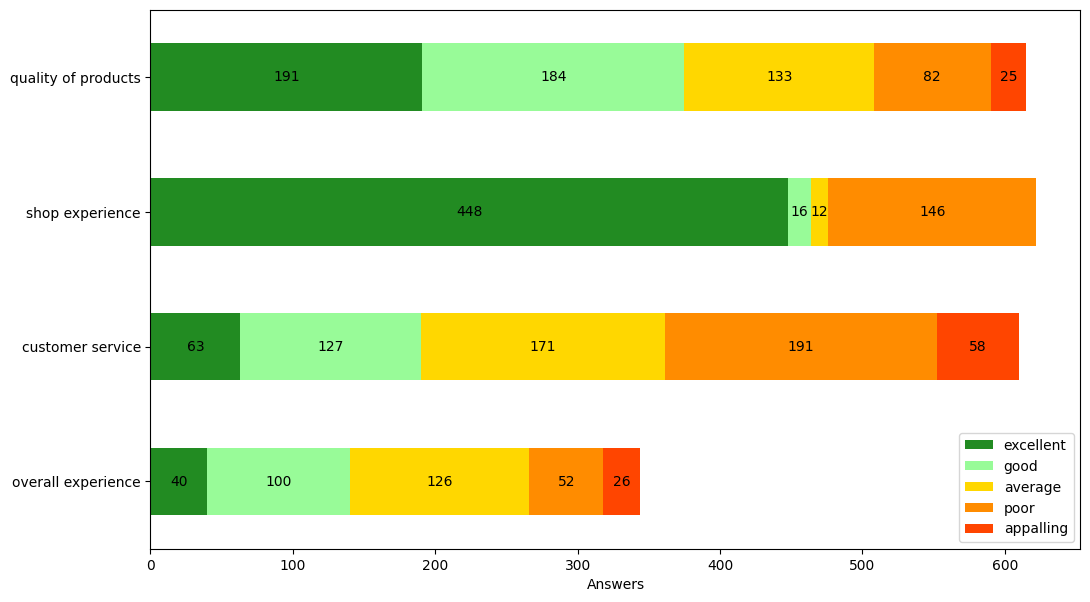

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as col

excellent = [191, 448, 63, 40]
good = [184, 16, 127, 100]
average = [133, 12, 171, 126]
poor = [82, 146, 191, 52]
appalling = [25, 0, 58, 26]



df = pd.DataFrame(data={'excellent': excellent, 'good': good, 'average': average, 'poor': poor, 'appalling': appalling})
df.index = ['quality of products', 'shop experience', 'customer service', 'overall experience']

cmap = ["#228B22", "#98FB98", "#FFD700", "#FF8C00", "#FF4500"]

ax = df.plot(kind='barh', stacked=True, figsize=(12, 7), rot=0, xlabel='Answers', ylabel='', color=cmap)
for c in ax.containers:
    
    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_width()) if v.get_width() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

plt.gca().invert_yaxis()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


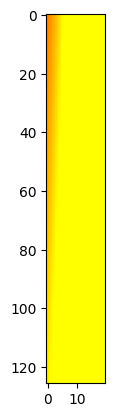

In [97]:
import numpy as np
import colorcet
import colorsys
import matplotlib.colors as col




def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.rad2deg(np.arctan(y / x))
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(np.deg2rad(phi))
    y = rho * np.sin(np.deg2rad(phi))
    return(x, y)

def custom_hsv2rgb(h,s,v):
    return tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))

extent = (-1, 1, -2 * np.pi, 2 * np.pi)
delta=0.1
x = np.arange(extent[0], extent[1], delta)
y = np.arange(extent[2], extent[3], delta)

X, Y = np.meshgrid(x, y)

X_1 = np.exp(X) + np.cos(np.deg2rad(Y))
Y_1 = np.exp(X) + np.sin(np.deg2rad(Y))

# translate X and Y to polar coordinates
# radius
# Rad=(X_1**2+Y_1**2)**0.5
# # angle (arctan2 returns values in [-pi,pi]. transform this to [0,2*pi] via mod)
# # rho,phi = cart2pol(X_1,Y_1)
# Phi=np.arctan2(np.deg2rad(Y_1),np.deg2rad(X_1))
# # allocate free space for an HSV image
# imgHSV=np.zeros(X_1.shape+(3,),dtype=np.double)
# # set hue to Phi (re-scale by 2*pi)
# imgHSV[:,:,0]=Phi/(2*np.pi)
# # saturation to full value
# imgHSV[:,:,1]=1.
# # value given by radius
# # scale radius=1 to maximal value=1, replace all larger radii by 1
# maxRad=1.
# imgHSV[:,:,2]=1.
# # imgHSV[:,:,2]=np.minimum(Rad/maxRad,1.)
# # transform to RGB
# img=col.hsv_to_rgb(imgHSV)
# # show image
# plt.imshow(img,extent=extent)
# plt.show()



rho,phi = cart2pol(X_1,Y_1)

height = 20
width = 126

one = np.ones((width, height))
res = []
for curr_x in range(width):
    tmp = []
    for curr_y in range(height):
        tmp.append([phi[curr_x][curr_y] / 180.0, one[curr_x][curr_y], rho[curr_x][curr_y]])
    res.append(tmp)

res = np.array(res)

plt.imshow(col.hsv_to_rgb(res))

plt.show()

